importing packages

In [95]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score,confusion_matrix
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline

loading data 

In [96]:
data=pd.read_csv('iris.csv')
data.head(2)

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa


In [97]:
data.shape

(150, 6)

label encoder

In [98]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
data.Species=enc.fit_transform(data.Species)

In [99]:
data.head(1)

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,0


In [100]:
data=data.loc[:,['Sepal.Length','Sepal.Width','Petal.Length','Petal.Width','Species']]

In [101]:
data.head(1)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,0


column name change

In [102]:
data=data.rename(columns={'Species':'target','Petal.Length':'petal_length','Petal.Width':'petal_width'})

In [103]:
data.head(1)


,Sepal.Length,Sepal.Width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0


In [106]:
data.isnull().sum()

Sepal.Length    0
Sepal.Width     0
petal_length    0
petal_width     0
target          0
dtype: int64

In [107]:
Counter(data.target)

Counter({0: 50, 1: 50, 2: 50})

In [108]:
x=data.iloc[:,:-1]

In [109]:
x.head(1)

,Sepal.Length,Sepal.Width,petal_length,petal_width
0,5.1,3.5,1.4,0.2


# model
training

In [110]:
model=KMeans(n_clusters=3,random_state=2)
model.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=2, tol=0.0001, verbose=0)

# output label found

In [53]:
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

In [54]:
accuracy_score(data.target,model.labels_)

0.8933333333333333

In [55]:
confusion_matrix(data.target,model.labels_)

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0, 14, 36]])

In [56]:
pd.crosstab(data.target,model.labels_)

col_0,0,1,2
target,,,
0,50,0,0
1,0,48,2
2,0,14,36


# visualization

In [57]:
y=pd.DataFrame(data.target)

In [58]:
y.head(1)

,target
0,0


# take any two features and visualize

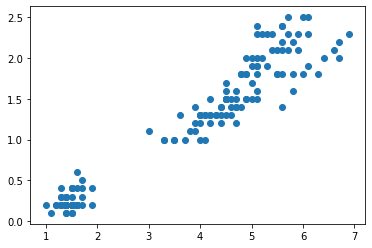

In [60]:
plt.scatter(x=data.petal_length,y=data.petal_width)


In [61]:
color=np.array(['red','green','yellow'])

Text(0.5, 1.0, 'actual data')

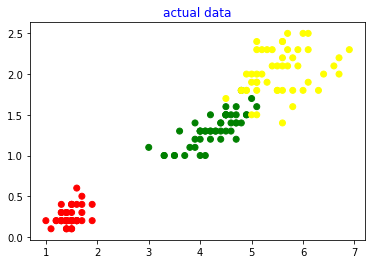

In [66]:
plt.scatter(x=data.petal_length,y=data.petal_width,c=color[data.target])
plt.title('actual data',c='blue')

Text(0.5, 1.0, 'predicted data')

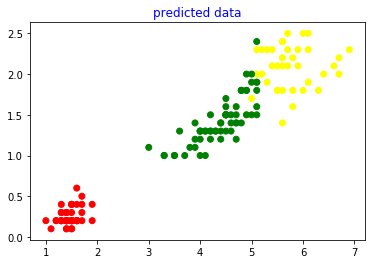

In [67]:
plt.scatter(x=data.petal_length,y=data.petal_width,c=color[model.labels_])
plt.title('predicted data',c='blue')

# distortion.....Avg dista to centroid

In [68]:
from scipy.spatial.distance import cdist

In [71]:
x=data.iloc[:,[2,3]]

In [73]:
x.head(1)

,petal_length,petal_width
0,1.4,0.2


In [85]:
distortions=[]
K=range(1,18)
for k in K:
    kmeanModel=KMeans(n_clusters=k)
    kmeanModel.fit(x)
    distortions.append(sum(np.min(cdist(x,kmeanModel.cluster_centers_,'euclidean'),axis=1))/x.shape[0])
    

In [86]:
distortions

[1.707364436891335,
 0.583920126422277,
 0.36876646966749166,
 0.2998651974037013,
 0.26508349289751987,
 0.2321583259365381,
 0.2114202918196384,
 0.19564438278396595,
 0.18448210694366965,
 0.17060520127478893,
 0.16330789206134225,
 0.1555998600237468,
 0.15042403811264302,
 0.14268594994543043,
 0.13838784992634043,
 0.1295429845481605,
 0.12743749151847678]

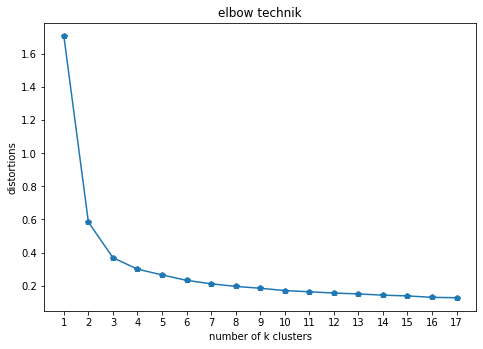

In [91]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.set_xticks(range(1,25))
ax.set_xlabel('number of k clusters')
ax.set_ylabel('distortions')
ax.set_title('elbow technik')
ax.plot(K,distortions,marker='p')

# 3 is fine confirmed from graph